<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_3_2_1_Lab_Logistic_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab - Logistic Loss

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [2]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Parameters
    ----------
    z : array_like
        A scalar or numpy array of any size.

    Returns
    -------
     g : array_like
         sigmoid(z)
    """
    z = np.clip( z, -500, 500 )           # protect against overflow
    g = 1.0/(1.0+np.exp(-z))

    return g

## Squared Error for Logistic Regression?

For linear regression we used the **squared error cost function**. The equation for the squared error cost with one variable is:

$$
J(w, b) = \frac{1}{2m}\sum_{i=0}^{m-1}\left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)^{2}
$$

where,

$$
f_{w,b}\left(x^{(i)}\right) = wx^{(i)} + b
$$

The squared error cost function has the nice property of being convex. Following the derivative of the cost leads to a global minimum.

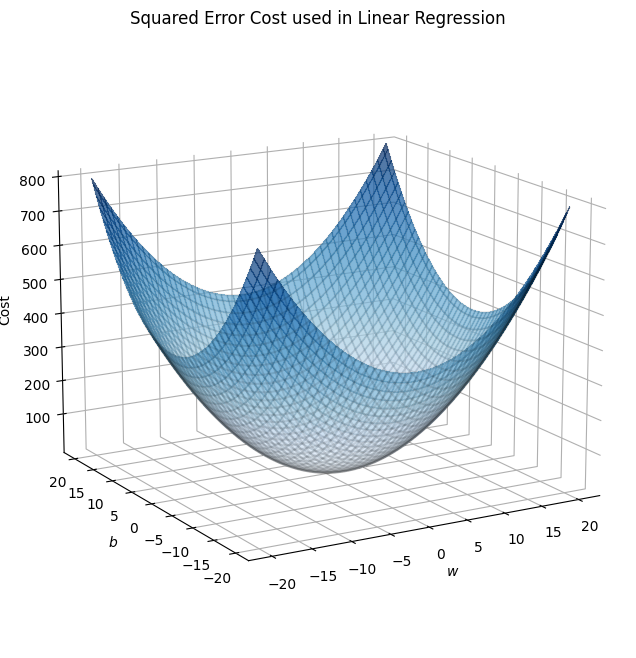

In [3]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_xlabel('$w$')
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_ylabel('$b$')
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_rotate_label(False)
ax.set_zlabel('Cost', rotation=90)
ax.set_title('Squared Error Cost used in Linear Regression')
ax.view_init(15, -120)

# linear spaces for w and b
w = np.linspace(-20, 20, 100)
b = np.linspace(-20, 20, 100)

# z-values for the bowl-shaped cost function
z = np.zeros((len(w), len(b)))
j = 0
for x in w:
    i = 0
    for y in b:
        z[i, j] = x**2 + y**2
        i += 1
    j += 1

# meshgride for plotting 3d funcdtions
W, B = np.meshgrid(w, b)

ax.plot_surface(W, B, z, cmap='Blues', alpha=0.7, antialiased=False)
ax.plot_wireframe(W, B, z, color='k', alpha=0.1)

plt.show()

This cost function works well for linear regression, so it is natural to consider it for logistic regression as well.

Let's try a squared error cost function from an earlier lab.

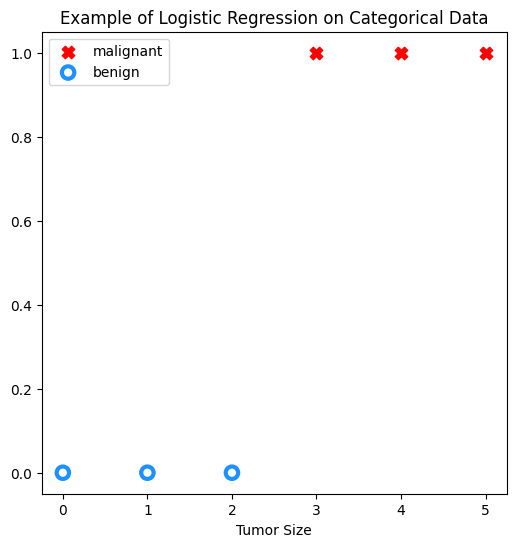

In [4]:
x_train = np.array([0, 1, 2, 3, 4, 5], dtype=np.longdouble)
y_train = np.array([0, 0, 0, 1, 1, 1], dtype=np.longdouble)

pos = (y_train == 1)
neg = (y_train == 0)

# plot data points
plt.figure(figsize=(6, 6))
plt.scatter(x_train[pos], y_train[pos],
            marker='X', s=80, c='red', label='malignant')
plt.scatter(x_train[neg], y_train[neg],
            marker='o', s=80, facecolors='none',
            edgecolor='dodgerblue', lw=3, label='benign')

plt.legend()
plt.xlabel('Tumor Size')
plt.title('Example of Logistic Regression on Categorical Data')

plt.show()

Let's get a surface plot of the cost using a squared error cost:

$$
J(w, b) = \frac{1}{2m}\sum_{i=0}^{m-1}\left(f_{w,b}\left(x^{(i)}\right) - y^{(i)}\right)^{2}
$$

where,

$$
f_{w,b}\left(x^{(i)}\right) = \text{sigmoid}\left(wx^{(i)} + b\right)
$$

In [5]:
def compute_cost_logistic_sq_error(X, y, w, b):
    """compute square error on logistic data for demo only"""
    m = X.shape[0]

    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)

    return np.squeeze(cost)

compute_cost_logistic_sq_error(x_train, y_train, 12.5, -20)

0.08222161649742892195

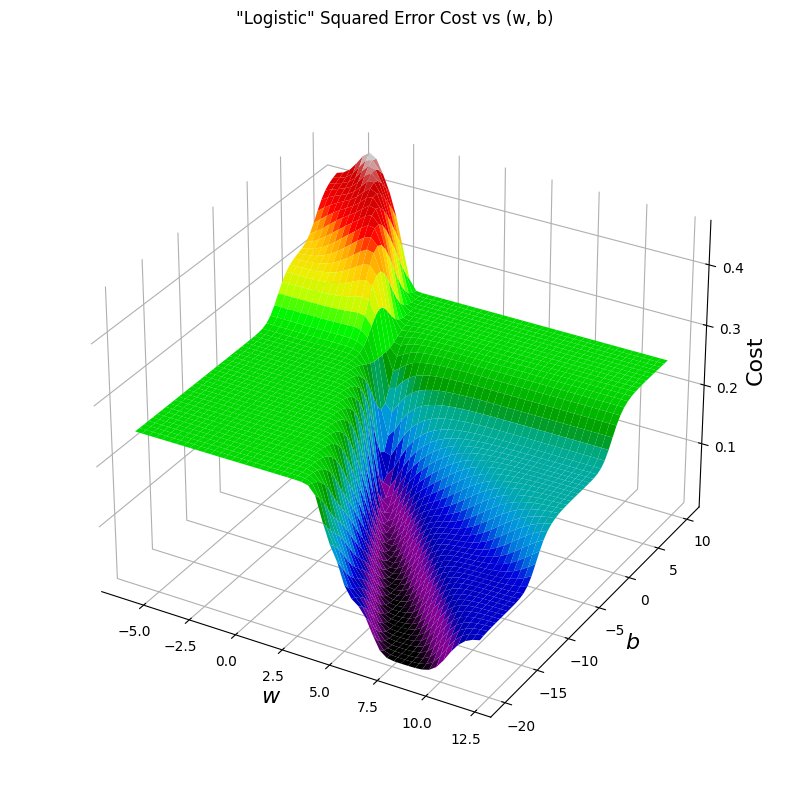

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('$w$', fontsize=16)
ax.set_ylabel('$b$', fontsize=16)
ax.set_zlabel("Cost", rotation=90, fontsize=16)
ax.set_title('"Logistic" Squared Error Cost vs (w, b)')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_box_aspect(aspect=None, zoom=0.9)

# linear spaces for w and b
w = np.linspace(-6, 12, 50)
b = np.linspace(10, -20, 50)

# cost
cost = np.zeros((len(w), len(b)))
j = 0
for x in w:
    i = 0
    for y in b:
        cost[i, j] = compute_cost_logistic_sq_error(x_train, y_train, x, y)
        i += 1
    j += 1

W, B = np.meshgrid(w, b)

ax.plot_surface(W, B, cost, cmap='nipy_spectral')

plt.show()

While this produces a pretty interesting plot, the surface above not nearly as smooth as the 'soup bowl' from linear regression!    

Logistic regression requires a cost function more suitable to its non-linear nature. This starts with a Loss function. This is described below.

## Cost Function

$$
J\left(\vec{w},b\right) = \frac{1}{m}\sum_{i=1}^{m}L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right)
$$

## Loss Function

$$
L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right) = \begin{cases}
-\log{\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} & y^{(i)} = 1 \\
-\log{\left(1 - f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} & y^{(i)} = 0
\end{cases}
$$

## Simplified Loss Function

$$
L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right) = -y^{(i)}\log{\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} - \left(1 - y^{(i)}\right)\log{\left(1 - f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)}
$$

## The Cost Function can be written like this:

$$
\begin{align}
J\left(\vec{w},b\right) &= \frac{1}{m}\sum_{i=1}^{m}\left(L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right)\right) \\
&= \frac{1}{m}\sum_{i=1}^{m}\left(-y^{(i)}\log{\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} - \left(1 - y^{(i)}\right)\log{\left(1 - f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)}\right) \\
&= -\frac{1}{m}\sum_{i=1}^{m}\left(y^{(i)}\log{\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} + \left(1 - y^{(i)}\right)\log{\left(1 - f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)}\right)
\end{align}
$$

## Two Logistic Loss Curves

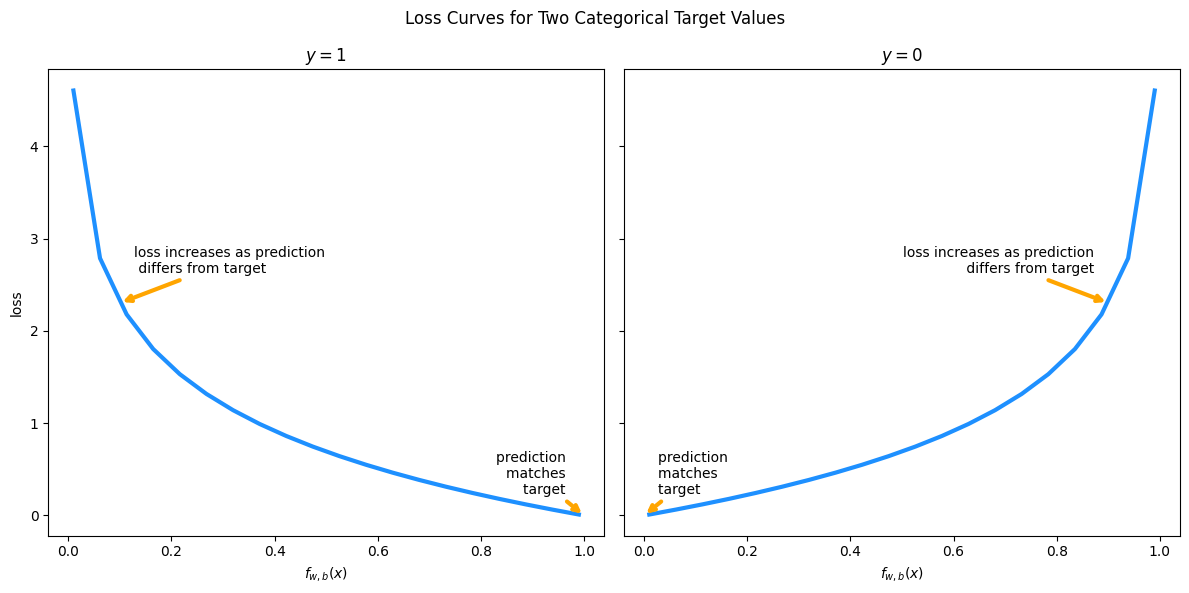

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

x = np.linspace(0.01, 1 - 0.01 , 20)
ax[0].set_ylabel('loss')

ax[0].plot(x, -np.log(x), color='dodgerblue', lw=3)
ax[0].set_title('$y = 1$')
ax[0].set_xlabel(r'$f_{w,b}(x)$')

ax[1].plot(x, -np.log(1 - x), color='dodgerblue', lw=3)
ax[1].set_title('$y = 0$')
ax[1].set_xlabel(r'$f_{w,b}(x)$')

ax[0].annotate("prediction \nmatches \ntarget ", xy= [1,0], xycoords='data',
                xytext=[-10,30],textcoords='offset points', ha="right", va="center",
                arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 3},)
ax[0].annotate("loss increases as prediction\n differs from target", xy= [0.1,-np.log(0.1)], xycoords='data',
                xytext=[10,30],textcoords='offset points', ha="left", va="center",
                arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 3},)
ax[1].annotate("prediction \nmatches \ntarget ", xy= [0,0], xycoords='data',
                xytext=[10,30],textcoords='offset points', ha="left", va="center",
                arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 3},)
ax[1].annotate("loss increases as prediction\n differs from target", xy= [0.9,-np.log(1-0.9)], xycoords='data',
                xytext=[-10,30],textcoords='offset points', ha="right", va="center",
                arrowprops={'arrowstyle': '->', 'color': 'orange', 'lw': 3},)
plt.suptitle("Loss Curves for Two Categorical Target Values", fontsize=12)
plt.tight_layout()
plt.show()

Combined, the curves are similar to the quadratic curve of the squared error loss. Note, the x-axis is $f_{\mathbf{w},b}$ which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.

## How to deal with `np.log(0)` in a safe manner

https://stats.stackexchange.com/questions/475589/numerical-computation-of-cross-entropy-in-practice

Cross-entropy loss: https://www.statlearning.com/

If it is not in the intro book it is definitely in this book: https://www.kdnuggets.com/2020/05/elements-statistical-learning-free-ebook.html

## Plot Logistic Cost

In [8]:
def log_1pexp(x, maximum=20):
    ''' approximate log(1+exp^x)
        https://stats.stackexchange.com/questions/475589/numerical-computation-of-cross-entropy-in-practice
    Args:
    x   : (ndarray Shape (n,1) or (n,)  input
    out : (ndarray Shape matches x      output ~= np.log(1+exp(x))
    '''

    out  = np.zeros_like(x,dtype=float)
    i    = x <= maximum
    ni   = np.logical_not(i)

    out[i]  = np.log(1 + np.exp(x[i]))
    out[ni] = x[ni]
    return out

In [9]:
def compute_cost_matrix(X, y, w, b, logistic=False, lambda_=0, safe=True):
    """
    Computes the cost using  using matrices
    Args:
      X : (ndarray, Shape (m,n))          matrix of examples
      y : (ndarray  Shape (m,) or (m,1))  target value of each example
      w : (ndarray  Shape (n,) or (n,1))  Values of parameter(s) of the model
      b : (scalar )                       Values of parameter of the model
      verbose : (Boolean) If true, print out intermediate value f_wb
    Returns:
      total_cost: (scalar)                cost
    """
    m = X.shape[0]
    y = y.reshape(-1,1)             # ensure 2D
    w = w.reshape(-1,1)             # ensure 2D
    if logistic:
        if safe:  #safe from overflow
            z = X @ w + b                                                           #(m,n)(n,1)=(m,1)
            cost = -(y * z) + log_1pexp(z)
            cost = np.sum(cost)/m                                                   # (scalar)
        else:
            f    = sigmoid(X @ w + b)                                               # (m,n)(n,1) = (m,1)
            cost = (1/m)*(np.dot(-y.T, np.log(f)) - np.dot((1-y).T, np.log(1-f)))   # (1,m)(m,1) = (1,1)
            cost = cost[0,0]                                                        # scalar
    else:
        f    = X @ w + b                                                        # (m,n)(n,1) = (m,1)
        cost = (1/(2*m)) * np.sum((f - y)**2)                                   # scalar

    reg_cost = (lambda_/(2*m)) * np.sum(w**2)                                   # scalar

    total_cost = cost + reg_cost                                                # scalar

    return total_cost                                                           # scalar

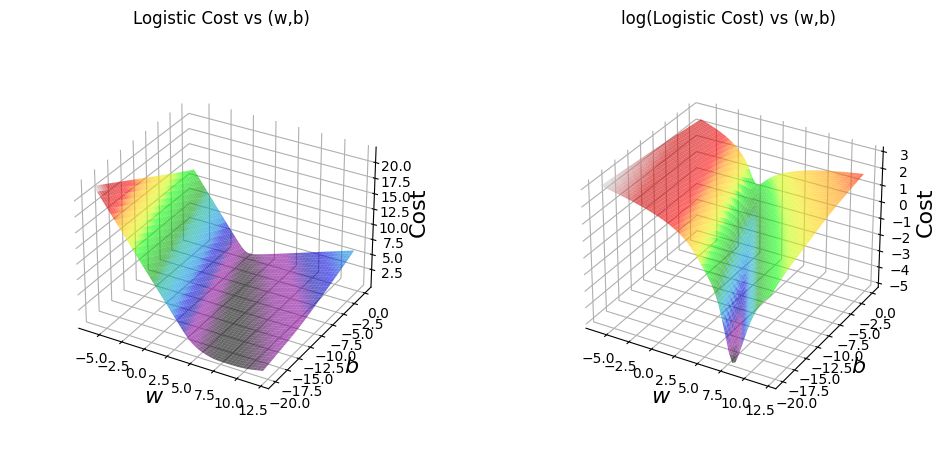

In [10]:
w = np.linspace(-6, 12, 50)
b = np.linspace(0, -20, 50)

cost = np.zeros((len(w), len(b)))
j = 0
for x in w:
    i = 0
    for y in b:
        cost[i, j] = compute_cost_matrix(x_train.reshape(-1, 1), y_train, x, y, logistic=True, safe=True)
        i += 1
    j += 1

W, B = np.meshgrid(w, b)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.set_xlabel('$w$', fontsize=16)
ax.set_ylabel('$b$', fontsize=16)
ax.set_zlabel("Cost", rotation=90, fontsize=16)
ax.set_title('Logistic Cost vs (w,b)')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_box_aspect(aspect=None, zoom=0.8)

ax.plot_surface(W, B, cost, alpha=0.6, cmap='nipy_spectral')

ax = fig.add_subplot(122, projection='3d')
ax.set_xlabel('$w$', fontsize=16)
ax.set_ylabel('$b$', fontsize=16)
ax.set_zlabel("Cost", rotation=90, fontsize=16)
ax.set_title('log(Logistic Cost) vs (w,b)')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.set_box_aspect(aspect=None, zoom=0.8)

ax.plot_surface(W, B, np.log(cost), alpha=0.6, cmap='nipy_spectral')

plt.show()

This curve is well suited to gradient descent! It does not have plateaus, local minima, or discontinuities. Note, it is not a bowl as in the case of squared error. Both the cost and the log of the cost are plotted to illuminate the fact that the curve, when the cost is small, has a slope and continues to decline.